# Evaluatiemetrieken - Oefeningen

In [15]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from res.Functions import *

In [8]:
# TP: True Positive
# FP: False Positive
# FN: False Negative
# FP: False Positive
# TPR: True Positive Rate
# FPR: False Positive Rate

# Accuracy = (Total Positive + Total Negative) / Total
def calculate_accuracy(x, y, total):
    return (x + y) / total

# Precision(YES)    = Total Positive / (Total Positive + False Positive)
# Precision(NO)     = Total Negative / (Total Negative + False Negative)
def calculate_precision(x, y):
    return x / (x + y)


# Recall(YES)   = Total Positive / (Total Positive / False Negative)
# Recall(NO)    = Total Negative / (Total Negative / False Positive)
def calculate_recall(x, y):
    return x / (x + y)


def calculate_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)


def calculate_f1_5(precision, recall):
    return (1.5 ** 2 + 1) * (precision * recall) / ((1.5 ** 2 * precision) + recall)


# Total Positive Ratio(YES) = Total Positive / (Total Positive + False Negative)    = RECALL(YES)
# Total Positive Ratio(NO)  = Total Negative / (Total Negative + False Positive)    = RECALL(NO)
def calculate_tpr(x, y):
    return x / (x + y)


# False Positive Ratio(YES) = False Positive / (False Positive + Total Negative)
# False Positive Ratio(NO)  = False Negative / (False Negative + Total Positive)
def calculate_fpr(x, y):
    return x / (x + y)


def calculate_metrics(matrix, pos_label, neg_label):
    tp = matrix.at[f"Actual {pos_label}", f"Predicted {pos_label}"]
    tn = matrix.at[f"Actual {neg_label}", f"Predicted {neg_label}"]
    fp = matrix.at[f"Actual {neg_label}", f"Predicted {pos_label}"]
    fn = matrix.at[f"Actual {pos_label}", f"Predicted {neg_label}"]
    total = matrix.at["Total Predicted", "Total Actual"]

    accuracy = calculate_accuracy(tp, tn, total)
    precision_pos = calculate_precision(tp, fp)
    precision_neg = calculate_precision(tn, fn)
    recall_pos = calculate_recall(tp, fn)
    recall_neg = calculate_recall(tn, fp)
    f1_pos = calculate_f1(precision_pos, recall_pos)
    f1_neg = calculate_f1(precision_neg, recall_neg)
    f1_5_pos = calculate_f1_5(precision_pos, recall_pos)
    f1_5_neg = calculate_f1_5(precision_neg, recall_neg)
    tpr_pos = calculate_tpr(tp, fn)
    tpr_neg = calculate_tpr(tn, fp)
    fpr_pos = calculate_fpr(fp, tn)
    fpr_neg = calculate_fpr(fn, tp)

    return {
        "accuracy": accuracy,
        "precision_pos": precision_pos,
        "precision_neg": precision_neg,
        "recall_pos": recall_pos,
        "recall_neg": recall_neg,
        "f1_pos": f1_pos,
        "f1_neg": f1_neg,
        "f1_5_pos": f1_5_pos,
        "f1_5_neg": f1_5_neg,
        "tpr_pos": tpr_pos,
        "tpr_neg": tpr_neg,
        "fpr_pos": fpr_pos,
        "fpr_neg": fpr_neg
    }


# Function to calculate metrics for a specific class in a multi-class confusion matrix
def calculate_class_specific_metrics(matrix, class_label):
    total_positive = matrix.at[class_label, class_label]
    false_negative = matrix.at[class_label, "Total Actual"] - tp
    false_positive = matrix.at["Total Predicted", class_label] - tp
    total = matrix.at["Total Predicted", "Total Actual"]
    total_negative = total - total_positive - false_negative - false_positive

    accuracy = calculate_accuracy(total_positive, total_negative, total)
    precision = calculate_precision(total_positive, false_positive)
    recall = calculate_recall(total_positive, false_negative)
    f1 = calculate_f1(precision, recall)
    f1_5 = calculate_f1_5(precision, recall)
    tpr = calculate_tpr(total_positive, false_negative)
    fpr = calculate_fpr(false_positive, total_negative)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "f1_5": f1_5,
        "tpr": tpr,
        "fpr": fpr
    }

## Vraag 1 – Accuracy, Precision, Recall, F-measure
![Matrix](../media/img.png)

In [4]:
# A) Wat zijn de waarden voor TP, TN, FP, FN?
tp = 100
tn = 50
fp = 10
fn = 5

In [7]:
# Creating the confusion matrix from the provided image data
data = {
    "Predicted YES": [100, 10, 110],
    "Predicted NO": [5, 50, 55],
    "Total Actual": [105, 60, 165]
}

index = ["Actual YES", "Actual NO", "Total Predicted"]
confusion_matrix = pd.DataFrame(data, index=index)

calculate_metrics(confusion_matrix, "YES", "NO")

(TP + TN) / TOTAL = ACCURACY


{'accuracy': 0.9090909090909091,
 'precision_pos': 0.9090909090909091,
 'precision_neg': 0.9090909090909091,
 'recall_pos': 0.9523809523809523,
 'recall_neg': 0.8333333333333334,
 'f1_pos': 0.9302325581395349,
 'f1_neg': 0.8695652173913043,
 'f1_5_pos': 0.9386281588447652,
 'f1_5_neg': 0.8552631578947367,
 'tpr_pos': 0.9523809523809523,
 'tpr_neg': 0.8333333333333334,
 'fpr_pos': 0.16666666666666666,
 'fpr_neg': 0.047619047619047616}

## Vraag 2 – Accuarcy, Precision, Recall, F-measure

In [9]:
data = {
    "Predicted A": [100, 50, 150],
    "Predicted B": [0, 5, 5],
    "Total Actual": [100, 55, 155]
}

index = ["Actual A", "Actual B", "Total Predicted"]
confusion_matrix = pd.DataFrame(data, index=index)
calculate_metrics(confusion_matrix, "A", "B")


{'accuracy': 0.6774193548387096,
 'precision_pos': 0.6666666666666666,
 'precision_neg': 1.0,
 'recall_pos': 1.0,
 'recall_neg': 0.09090909090909091,
 'f1_pos': 0.8,
 'f1_neg': 0.16666666666666669,
 'f1_5_pos': 0.8666666666666666,
 'f1_5_neg': 0.1262135922330097,
 'tpr_pos': 1.0,
 'tpr_neg': 0.09090909090909091,
 'fpr_pos': 0.9090909090909091,
 'fpr_neg': 0.0}

![Reply](../media/img_1.png)

## Vraag 3 – Accuarcy, Precision, Recall, F-measure

In [10]:
# Creating the confusion matrix from the new provided image data
multi_class_data = {
    "Asfalt": [2385, 4, 0, 1, 4, 2394],
    "Beton": [0, 332, 0, 0, 1, 333],
    "Gras": [0, 1, 908, 8, 0, 917],
    "Boom": [0, 0, 0, 1084, 9, 1093],
    "Gebouw": [12, 0, 0, 6, 2053, 2071],
    "Total Actual": [2397, 337, 908, 1099, 20679, 6808]
}

multi_class_index = ["Asfalt", "Beton", "Gras", "Boom", "Gebouw", "Total Predicted"]
multi_class_confusion_matrix = pd.DataFrame(multi_class_data, index=multi_class_index)

calculate_class_specific_metrics(multi_class_confusion_matrix, "Gras")

{'accuracy': 1.1164806110458285,
 'precision': 0.5263768115942029,
 'recall': 0.5291375291375291,
 'f1': 0.5277535600116244,
 'f1_5': 0.5282849982098102,
 'tpr': 0.5291375291375291,
 'fpr': 0.10878828229027963}

# Vraag 4

In [13]:
simpsons_roc1 = pd.read_csv('../datasets/simpsons_roc1.csv', delimiter=',', decimal='.')
display(simpsons_roc1.head())

simpsons_roc2 = pd.read_csv('../datasets/simpsons_roc2.csv', delimiter=',', decimal='.')
display(simpsons_roc2.head())

,y_true,y_score
0,0,0.001611
1,1,0.568856
2,0,0.224951
3,1,0.678186
4,1,0.780744


,y_true,y_score
0,0,2.877834e-10
1,1,7.970729e-01
2,0,2.533495e-03
3,1,9.756606e-01
4,1,9.971678e-01


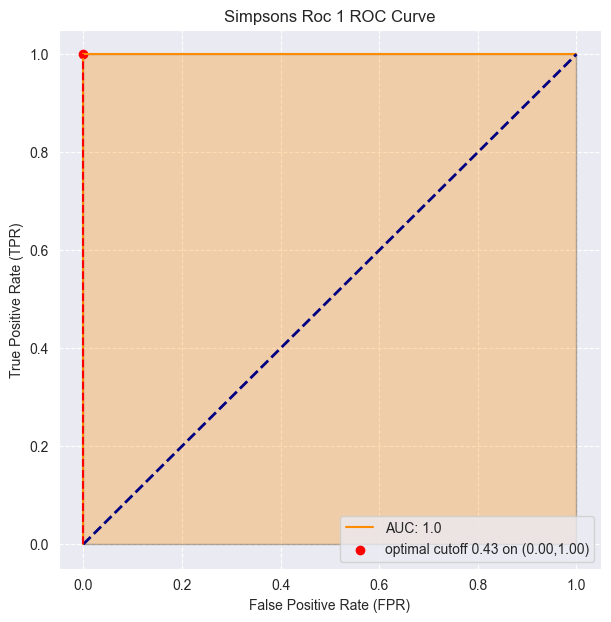

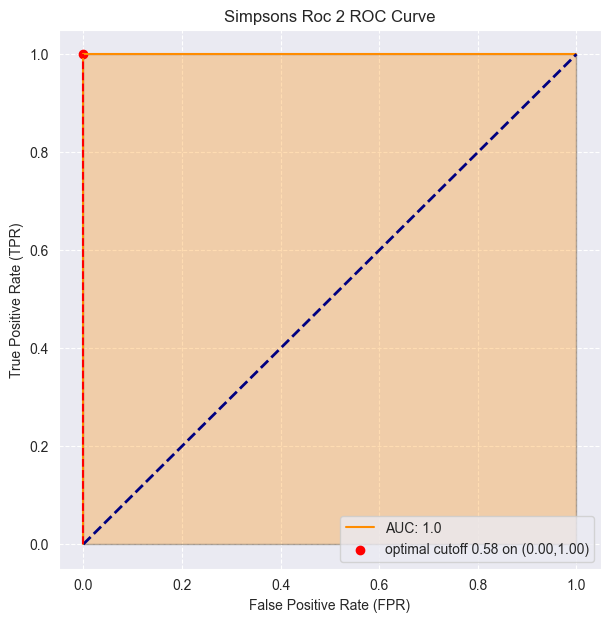

In [16]:
plot_rocf(y_true=simpsons_roc1['y_true'], y_score=simpsons_roc1['y_score'], title='Simpsons Roc 1 ROC Curve')
plot_rocf(y_true=simpsons_roc2['y_true'], y_score=simpsons_roc2['y_score'], title='Simpsons Roc 2 ROC Curve')

In [20]:
# Calculate Based Threshold Value
best_threshold1 = find_best_threshold(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
print(best_threshold1)
best_threshold2 = find_best_threshold(simpsons_roc2['y_true'], simpsons_roc2['y_score'])
print(best_threshold2)

0.4319972097873688
0.576374351978302


In [23]:
# Calculate AUC (Area Under Curve)
auc1 = roc_auc_score(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
print(auc1)

auc2 = roc_auc_score(simpsons_roc2['y_true'], simpsons_roc2['y_score'])
print(auc2)

1.0
1.0


In [21]:
# Apply threshold value to y_score column
simpsons_roc1['y_pred'] = simpsons_roc1['y_score'].apply(lambda x: 1 if x > best_threshold1 else 0)
simpsons_roc2['y_pred'] = simpsons_roc2['y_score'].apply(lambda x: 1 if x > best_threshold2 else 0)

# Question 5

In [24]:
# Load in data and filter data
education_roc1 = pd.read_csv('../datasets/education_roc1.csv', delimiter=',', decimal='.')
education_roc2 = pd.read_csv('../datasets/education_roc2.csv', delimiter=',', decimal='.')

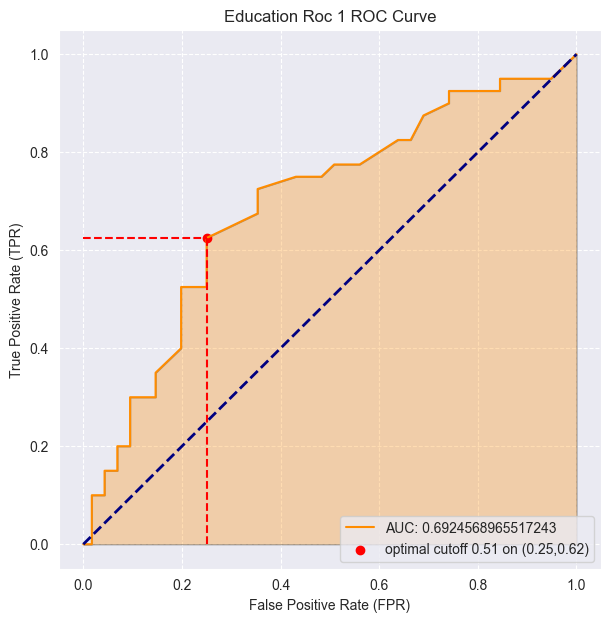

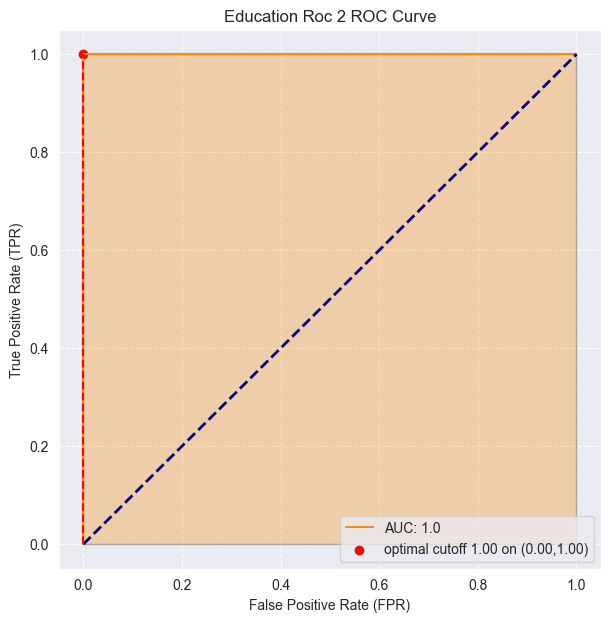

In [25]:
# Transform data set
education_roc1['y_true'] = education_roc1['y_true'].apply(lambda x: 1 if x == '6-11yrs' else 0)
education_roc2['y_true'] = education_roc2['y_true'].apply(lambda x: 1 if x == '6-11yrs' else 0)

# Plot ROC curve for Education Roc 1 & 2
plot_rocf(y_true=education_roc1['y_true'], y_score=education_roc1['6-11yrs'], title='Education Roc 1 ROC Curve')
plot_rocf(y_true=education_roc2['y_true'], y_score=education_roc2['6-11yrs'], title='Education Roc 2 ROC Curve')

In [27]:
# Calculate Based Threshold Value
best_threshold1 = find_best_threshold(education_roc1['y_true'], education_roc1['6-11yrs'])
print(best_threshold1)

best_threshold2 = find_best_threshold(education_roc2['y_true'], education_roc2['6-11yrs'])
print(best_threshold2)

0.4773177037798583
1.0
